## 練習時間

請觀看李宏毅教授以神奇寶貝進化 CP 值預測的範例，解說何謂機器學習與過擬合。並回答以下問題

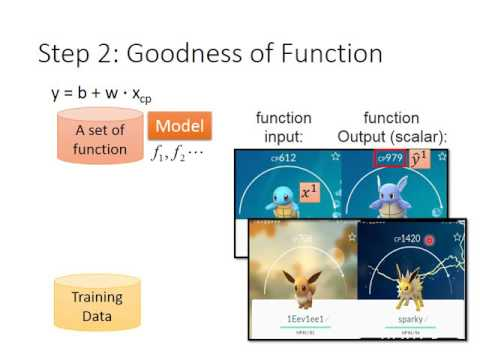

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("fegAeph9UaA", width=720, height=480)

### 1. 模型的泛化能力 (generalization) 是指什麼？ 

ANS: The generalization ability of an algorithm to correctly estimate the answer of a new data. The algorithm can be a trained ML function, and if the function is incapable of presenting the estimation (testing) error close to the training error, this function is incapable of generalizing, or is overfitting. The generalization error is the estimation of the loss to when the function is applied to new data.

### 2. 分類問題與回歸問題分別可用的目標函數有哪些？
* 「機器學習中所有的算法都需要最大化或最小化一個函數，這個函數被稱為「目標函數」。需要被最小化的目標函數被稱為「損失函數」
* 目標函數可為損失函數或損失函數+正則項，分為經驗風險最小化及結構風險最小化
* 分類問題可用的目標函數


1. Supervised Learning
    $$min_{\theta}\frac{1}{l}\sum_{i=1}^{l}{L(x_i,y_i;\theta)}$$
    $$max_{\theta}\prod_{i=1}^{l}{P(x_i;\theta)}$$
    $$max_{\theta}\sum_{i=1}^{l}{lnP(x_i;\theta)}$$

2. 二元分類問題可用的目標函數
    感知機: 對於誤分類集M, $$L(w,b)=-\sum_{x_i\in M}{y_i\left(wx_{i}+b\right)}+\lambda \left|\left|w\right|\right|^{2}$$
    Logistic Regression: $$\sum_{i=1}^{n}\left[{y_i ln(h_\theta (x_i))+(1-y_i)lg(1-h_\theta (x_i))}\right]+\lambda \left|\left|w\right|\right|^{2}$$
    SVM: 下標+表示只有正值才計入$$\sum_{i=1}^{m}\left[1-y_i \left(wx_i +b\right)\right]_{+}+\lambda \left|\left|w\right|\right|^{2}$$

3. 多元分類問題可用的目標函數
    決策樹:
    Softmax: $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k}1\{y^{(i)}=j\}\log\frac{e^{\theta^T_j x^{(i)}}}{\sum_{l=1}^{k}e^{\theta^T_l x^{(i)}}}+\lambda \left|\left|w\right|\right|^{2}$$
    均方誤差: $$J(w)=\frac{1}{n}\sum_{i=1}^{n}\left(y_i-f(x_i)\right)^{2}=\frac{1}{n}\biggl|\biggl|y-Xw\biggl|\biggl|^{2}+\lambda \left|\left|w\right|\right|^{2}$$
    線性判別分析(LDA): $$maxL(W)=\frac{tr\left(W^TS_BW\right)}{tr\left(W^TS_WW\right)}+\lambda \left|\left|w\right|\right|^{2}$$
    決策樹:
    GDBT:
    
4. 回歸問題可用的目標函數
    binary/multi-calss classification: $$min\sum_{i=1}^{l}\frac{1}{2l}\biggl|\biggl|y_i-(w^Tx_i+b)\biggl|\biggl|^{2}+\lambda \left|\left|w\right|\right|^{2}$$
    決策樹:


In [1]:
import pandas as pd

In [2]:
electricity = pd.read_excel('../data/Folds5x2_pp.xlsx')

In [3]:
electricity.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
electricity[electricity.isnull().values==True]

,AT,V,AP,RH,PE


In [5]:
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


In [13]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(), X = electricity[features],
y = electricity[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [14]:
print('Training scores:nn', train_scores)
print('n', '-' * 70) # separator to make the output easy to read
print('nValidation scores:nn', validation_scores)

Training scores:nn [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]
n ----------------------------------------------------------------------
nValidation scores:nn [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [15]:
pd_train_score = pd.DataFrame(data=train_scores, index=train_sizes)
pd_train_score

,0,1,2,3,4
1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
100,-19.712307,-18.314926,-18.314926,-18.314926,-18.314926
500,-18.144205,-19.638851,-19.638851,-19.638851,-19.638851
2000,-21.536034,-20.185688,-19.983174,-19.983174,-19.983174
5000,-20.477089,-19.933642,-20.560916,-20.415084,-20.415084
7654,-20.985653,-20.630061,-21.043847,-20.635268,-20.529556


In [16]:
pd_valid_score = pd.DataFrame(data=validation_scores, index=train_sizes)
pd_valid_score

,0,1,2,3,4
1,-619.305147,-379.810904,-374.410786,-370.030371,-373.305980
100,-21.802242,-23.011034,-20.813504,-22.884592,-23.449555
500,-19.960052,-21.277156,-19.751366,-21.432562,-21.890677
2000,-19.928638,-21.354401,-19.629742,-21.386316,-21.811031
5000,-19.888063,-21.318330,-19.682286,-21.350195,-21.759491
7654,-19.904679,-21.334488,-19.678311,-21.319351,-21.737789


In [18]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scoresnn', pd.Series(train_scores_mean, index = train_sizes))
print('n', '-' * 20) # separatorprint('nMean validation scoresnn',pd.Series(validation_scores_mean, index = train_sizes))


Mean training scoresnn 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64
n --------------------


(0, 40)

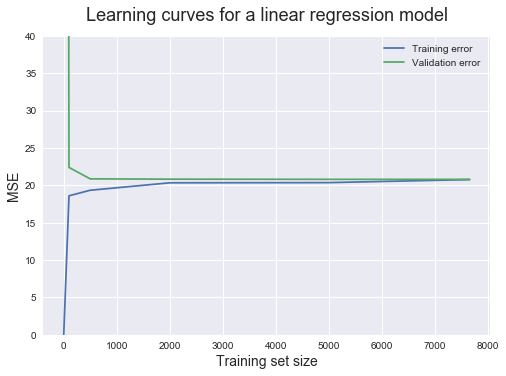

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)